<a href="https://colab.research.google.com/github/pchlenski/16s-ptr/blob/main/notebooks/properties_of_16s_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# Expanded imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as p

# network stuff
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config # for linux
!pip install pygraphviz
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# google colab specific stuff
from google.colab import drive
drive.mount('/content/drive')

# set environmental variables
dd = '/content/drive/MyDrive/notebooks/16s/data/' # data directory

# pandas settings
%load_ext google.colab.data_table

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bion

In [2]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/My Drive/fonts/Gill Sans.otf')

font = {
    'family' : 'Gill Sans', 
    'size' : 12
}
mpl.rc('font', **font)

# colors - consistent with google slides 'basic light' defaults
red = '#be1e2d'
blue = '#0097a7'
yellow = '#ffab40'

# other settings
mpl.rcParams['figure.dpi'] = 160
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['figure.frameon'] = False
mpl.rcParams['image.cmap'] = 'magma'
mpl.rcParams['patch.facecolor'] = '#00000000'
mpl.rcParams['legend.framealpha'] = 0
mpl.rcParams['axes.facecolor'] = '#fffff800'
mpl.rcParams['axes.linewidth'] = 2

# turn off spines
# mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.left'] = False

In [3]:
db = pd.read_pickle(f"{dd}/db.pkl")
db.head()

,genome,n_contigs,contig,16s_md5,16s_position,oor_position,size,16s_sequence
0,1002804.6,2,NC_015674,ee83b473e3e1a73261fb9d81369d6ea6,175344,608701.0,1807534,tttatggagagtttgatcctggctcagagtgaacgctggcggcgtg...
1,1002804.6,2,NC_015674,b132acc57af2bc910c1093fb26796c13,1422182,608701.0,1807534,tttatggagagtttgatcctggctcagagtgaacgctggcggcgtg...
2,1002809.3,2,AP012157,fcf362a4e87a949eb4e45f6ac5763b74,1186066,134724.0,3984229,cttttatggagagtttgatcctggctcaggacgaacgctggcggcg...
3,1002809.3,2,AP012157,efe0aaff6d1b2d9cf276f4cf5cf4f110,730790,134724.0,3984229,cttttatggagagtttgatcctggctcaggacgaacgctggcggcg...
4,1002809.3,2,AP012157,0c7ef9fe1fcbe01f62e498c944e7e5e4,290177,134724.0,3984229,cttttatggagagtttgatcctggctcaggacgaacgctggcggcg...


In [8]:
ssu = pd.read_table(f"{dd}/allSSU.tsv", dtype={0:str})
ssu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16732 entries, 0 to 16731
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   genome.genome_id         16732 non-null  object
 1   genome.contigs           16732 non-null  int64 
 2   genome.genome_length     16732 non-null  int64 
 3   feature.accession        16732 non-null  object
 4   feature.start            16732 non-null  int64 
 5   feature.end              16732 non-null  int64 
 6   feature.strand           16732 non-null  object
 7   feature.patric_id        16732 non-null  object
 8   feature.na_sequence      16725 non-null  object
 9   feature.na_sequence_md5  16725 non-null  object
 10  feature.product          16732 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


# Histograms

In [ ]:
# How many genomes share sequences?
db_md5_grouped = db.groupby('16s_md5').nunique()['genome']
bad_values = db_md5_grouped > 1
print(len(db_md5_grouped[bad_values]))

# This is not ideal. We will need to see what can be done about this.

48


(array([383., 225.,  96., 161.,  41.,  53.,  12.,   5.,   4.,   1.]),
 array([ 2. ,  3.6,  5.2,  6.8,  8.4, 10. , 11.6, 13.2, 14.8, 16.4, 18. ]),
 <a list of 10 Patch objects>)

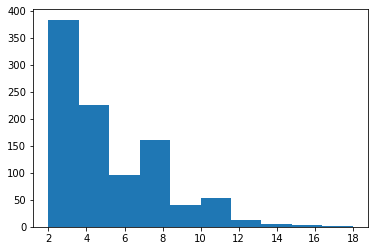

In [ ]:
# How many 16S sequences do we have per genome?
plt.hist(db.groupby('genome').count()['16s_sequence'])
plt.yscale('log')

# 2-8 sequences per genome are common; can have as many as 18.

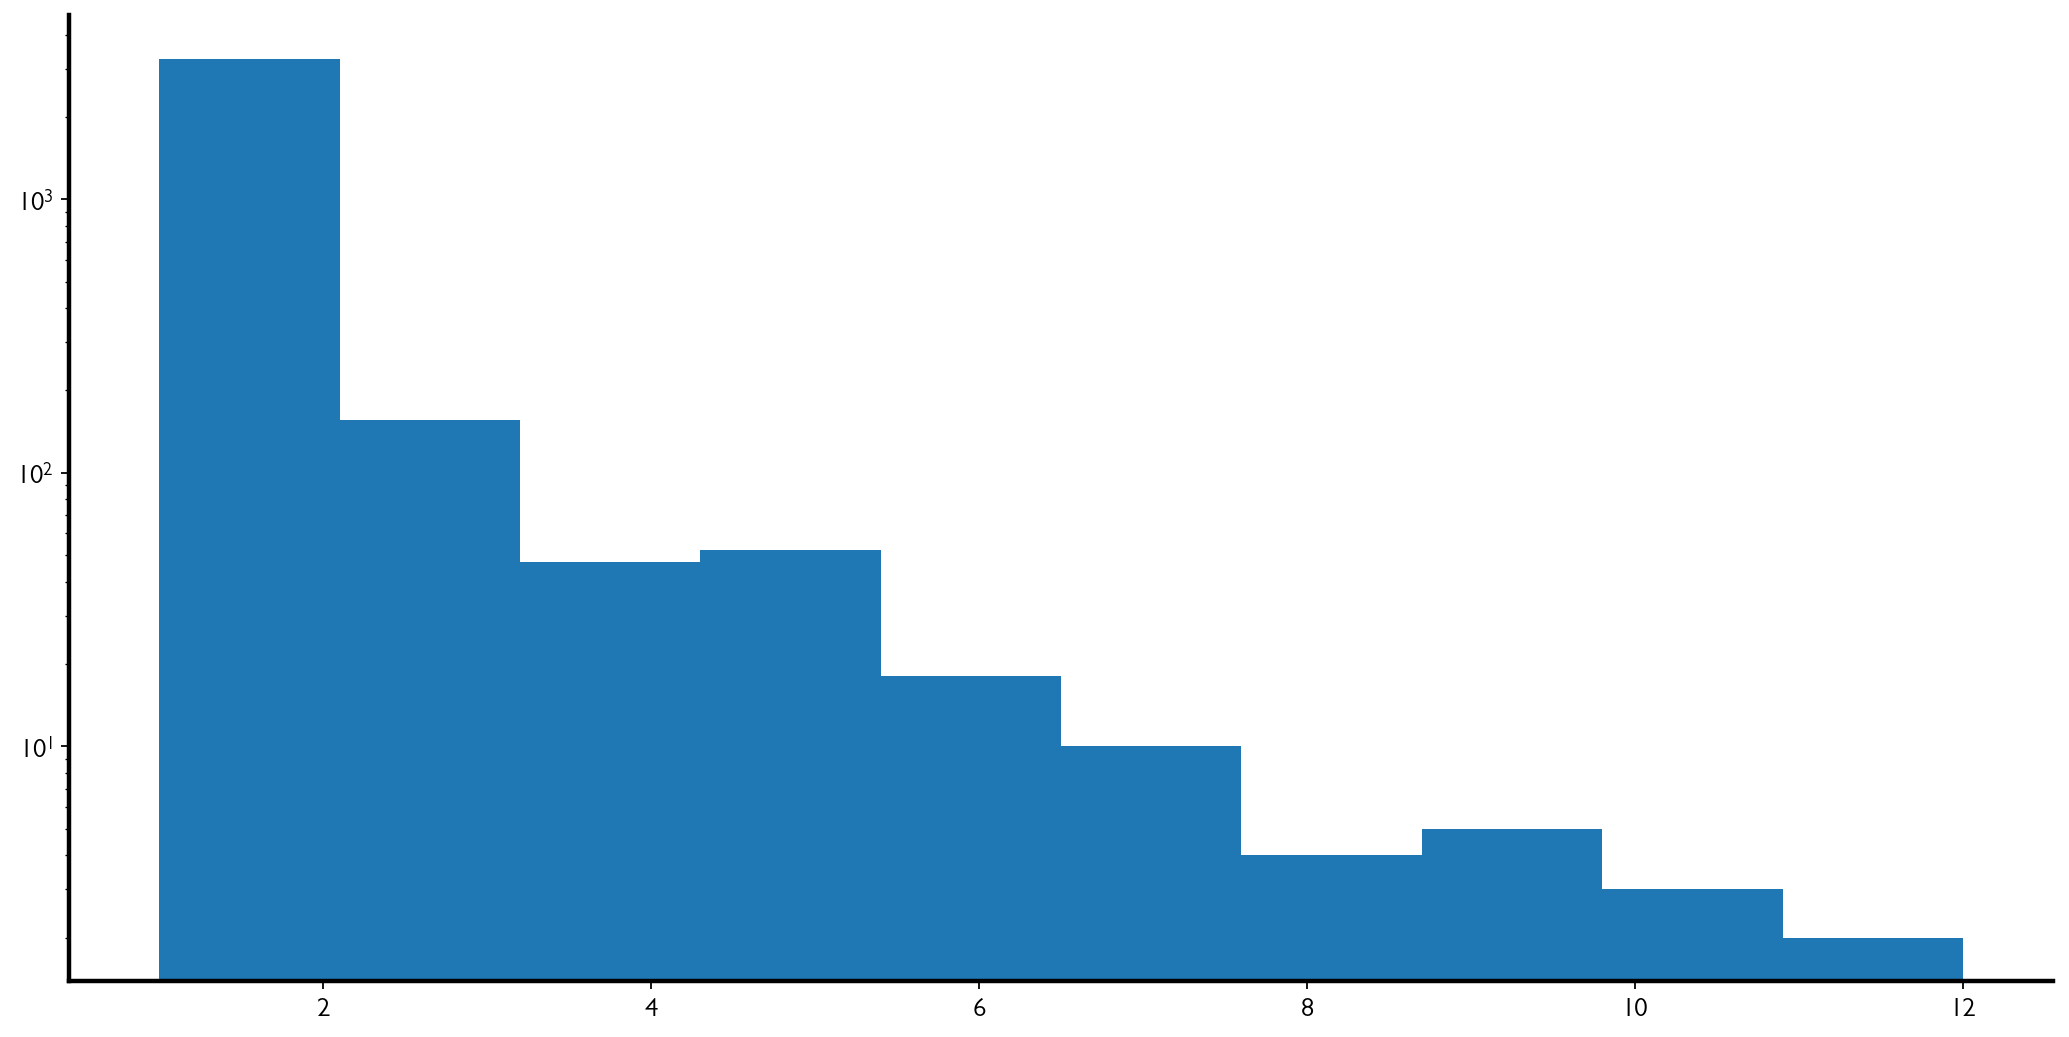

In [ ]:
# How many times does each 16S sequence appear?
plt.hist(db.groupby('16s_sequence').count()['genome'])
plt.yscale('log')

# Most sequences are unique; can have as many as 12.

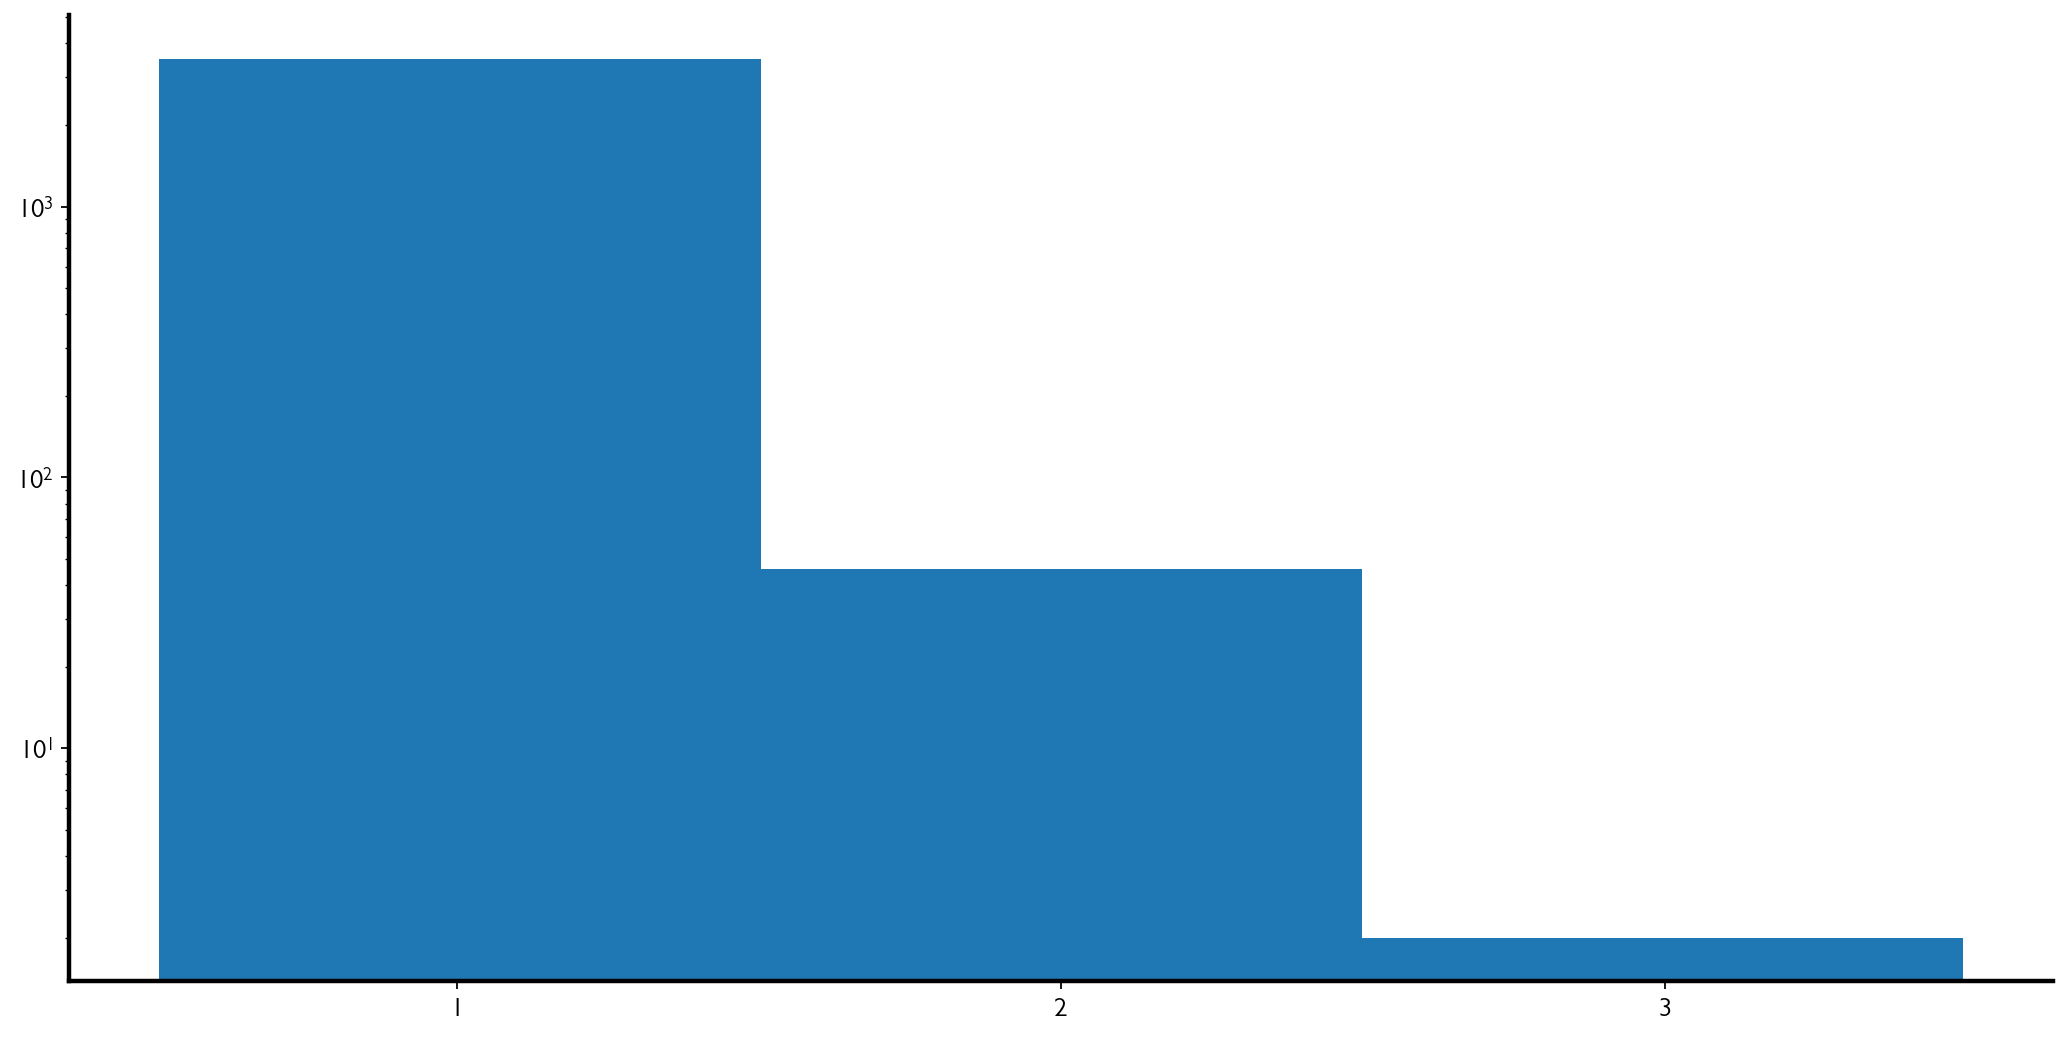

In [ ]:
# In how many genomes does each 16S sequence appear?
plt.hist(db.groupby('16s_sequence').nunique()['genome'], bins=3)
plt.xticks([1.33,2,2.67],[1,2,3])
plt.yscale('log')

# Most sequences are unique; can have as many as 12.

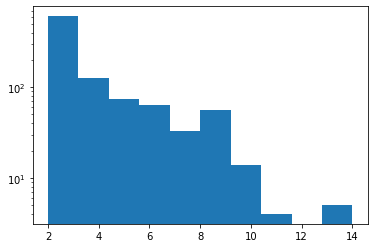

In [ ]:
# How many UNIQUE 16S sequences do we have?
plt.hist(db.groupby('genome').nunique()['16s_sequence'])
plt.yscale('log')

# Most DB entries have just 2 unique sequences, but can have as many as 14.

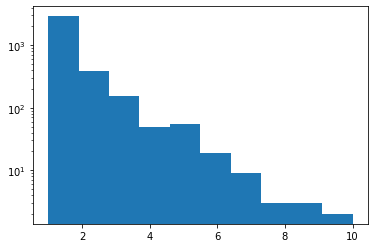

In [ ]:
# How many copies do we have per 16S sequence per genome?
plt.hist(db.groupby(['genome', '16s_sequence']).count()['16s_md5'])
plt.yscale('log')

# Most sequences appear only once per genome, but can appear as many as 10 times in a single genome.

# Distribution of distances between OOR and 16S

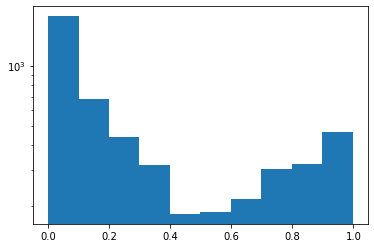

In [ ]:
# 16S-OOR distances, looking "down" the chromosome
dists1 = np.abs(db['16s_position'] - db['oor_position']) / db['size']
plt.hist(dists1)
plt.yscale('log')

# Takeaway: for some reason, 16S tends to cluster near the origin of replication

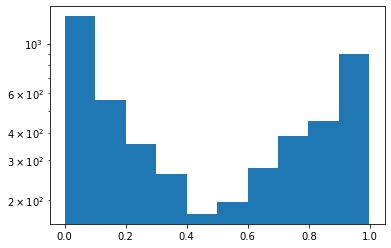

In [ ]:
# 16S-OOR distances, looking "up" the chromosome
dists2 = np.abs((db['16s_position'] + db['size'] - db['oor_position']) % db['size']) / db['size'] # TODO: check this math
plt.hist(dists2)
plt.yscale('log')

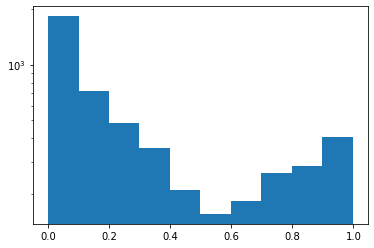

In [ ]:
dists3 = np.min([dists1, dists2], axis=0)
plt.hist(dists3)
plt.yscale('log')

# How bad are our multiply-mapped 16S?

# Adjacency matrix

In [29]:
# based on https://stackoverflow.com/questions/49429594/pandas-dataframe-to-adjacency-matrix#49430091

db_merge = db.merge(db, on='16s_md5')
results = pd.crosstab(db_merge['genome_x'], db_merge['genome_y'])
np.fill_diagonal(results.values, 0)

# get a 48x48 densified adjacency matrix
results_rows = results.sum() > 0
results_cols = results_rows[results_rows].index.unique()

results = results.loc[results_rows, results_cols]

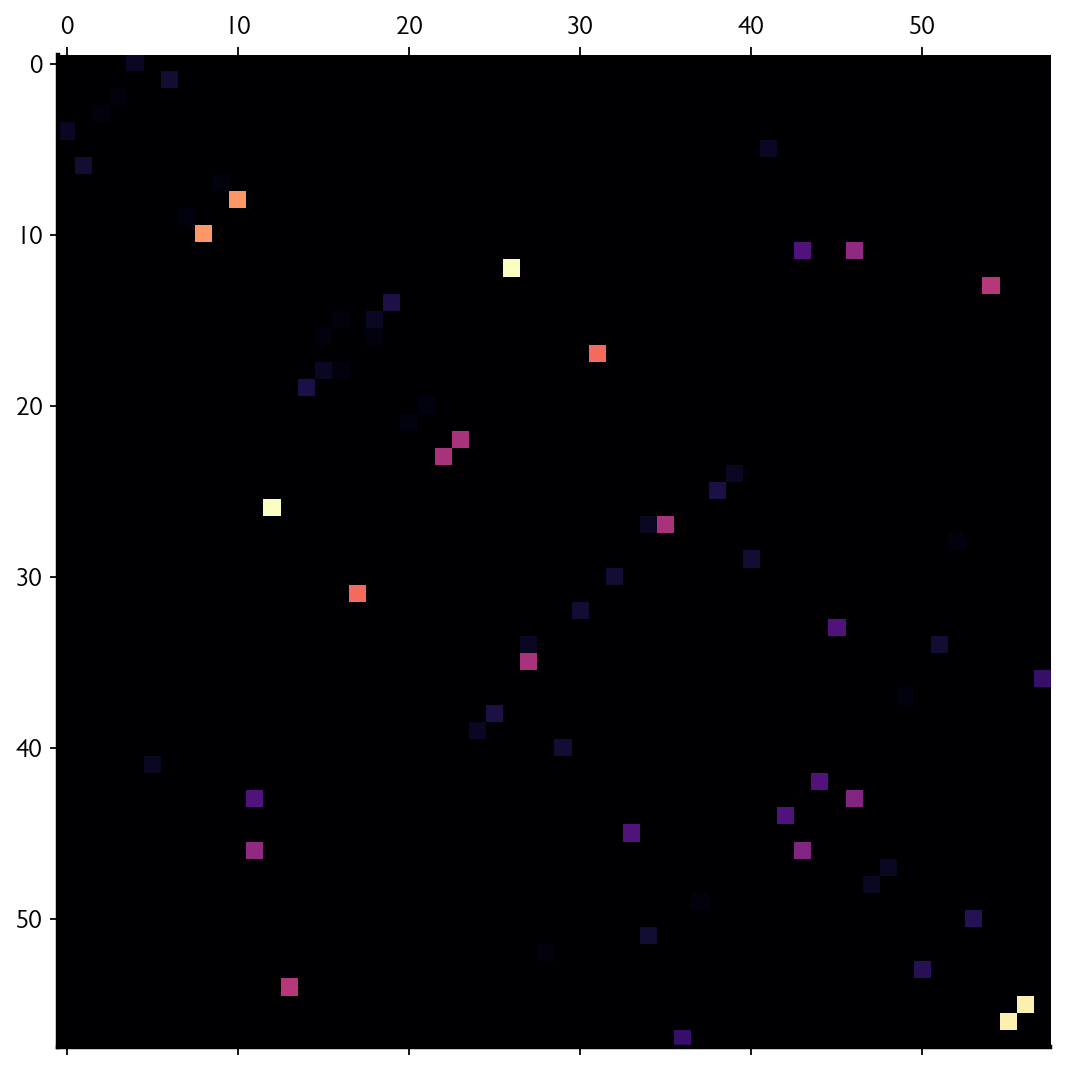

In [30]:
plt.matshow(results)

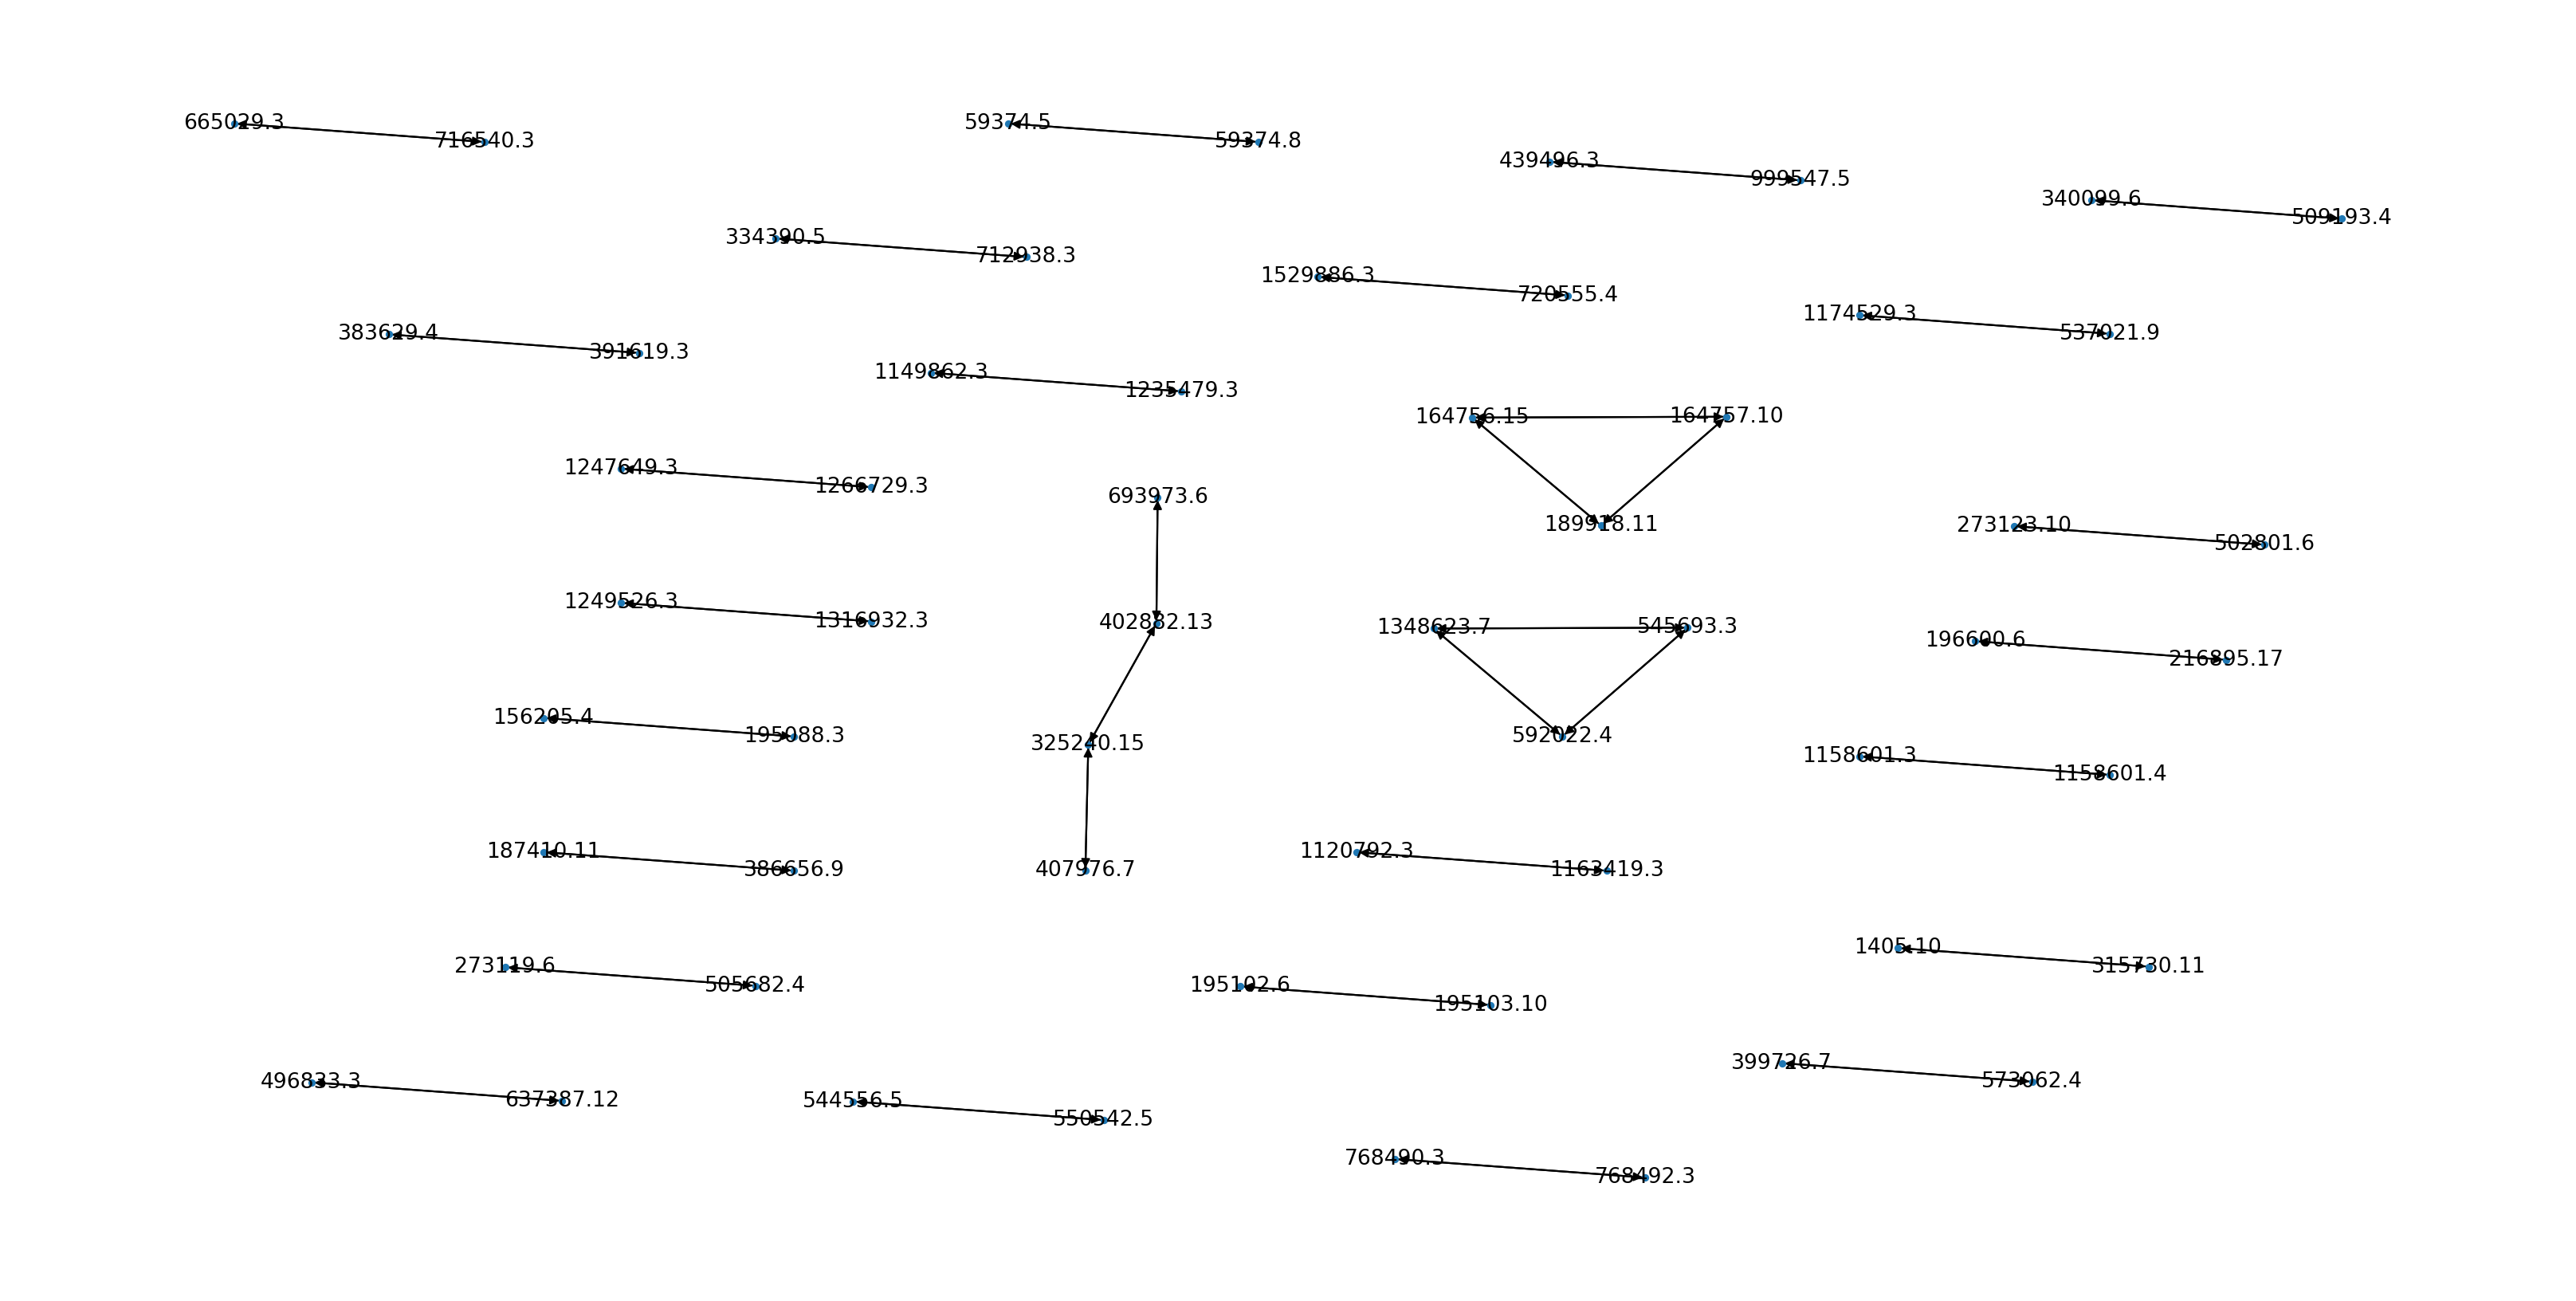

In [31]:
G = nx.DiGraph(results.values)

# fig, ax = plt.subplots(1,1,figsize=(20,10))
fig = plt.figure(figsize=(20,10))
nx.draw(
    G,
    # ax=ax,
    pos=graphviz_layout(G),
    node_size=10,
    labels={node:label for node,label in zip(G.nodes, results.index)}
)
# ax.patch.set_alpha(0)
fig.set_facecolor("#fffff800")

In [ ]:
# sanity check: look for shared edges here

print(results.loc['550542.5', '544556.5'])
print(results.loc['716540.3', '665029.3'])

8
5


In [ ]:
# Can we resolve the 4-node graph here?
four_graph = ['693973.6', '402882.13', '325240.15', '407976.7']
three_graph_1 = ['1348623.7', '545693.3', '592022.4']
three_graph_2 = ['164756.15', '164757.10', '189918.11']

def filter_adjacency(genomes):
    print(results.reindex(genomes)[genomes])

    # What if we just throw out overlapping sequences?
    db_g = db[db['genome'].isin(genomes)]
    db_g_unique = db_g.groupby('16s_md5').nunique()['genome'] == 1
    db_g_unique_list = db_g_unique[db_g_unique].index
    db_g_filtered = db_g[db_g['16s_md5'].isin(db_g_unique_list)]
    db_g_grouped = db_g_filtered.groupby(['genome', 'contig']).nunique()['16s_md5']

    print(db_g_grouped)
    if (db_g_grouped > 1).all():
        print("DB can be pruned")
    else:
        print("DB cannot be pruned")

filter_adjacency(four_graph)
# filter_adjacency(three_graph_1)
# filter_adjacency(three_graph_2)

# As we can see, each contig has at least 2 unique sequences once we throw away overlaps. This is reassuring.

genome_y   693973.6  402882.13  325240.15  407976.7
genome_x                                           
693973.6          0          3          0         0
402882.13         3          0          2         0
325240.15         0          2          0        15
407976.7          0          0         15         0
genome     contig   
325240.15  NC_009052    2
402882.13  NC_009665    6
407976.7   NC_011663    5
693973.6   CP002383     6
Name: 16s_md5, dtype: int64
DB can be pruned


In [ ]:
db[db['genome'].isin(four_graph)][['genome','16s_md5']].drop_duplicates()

,genome,16s_md5
2381,325240.15,de11acd396089119ea00992078940082
2382,325240.15,dcfd3b81e2b777343a7dd1850020aa70
2383,325240.15,1ca860a0561a69ebe0f087d91bd99a44
2385,325240.15,bb53c0cbac319ad8624e277657a4d9b0
2859,402882.13,6d101c861e3cd2b8a00a19ecb494f1fa
2860,402882.13,914e44b2a8035a91d8066710aba7ebed
2861,402882.13,bad0e9f58b352c4c03ba10afcae5694e
2862,402882.13,1ca860a0561a69ebe0f087d91bd99a44
2863,402882.13,2c971954b2da9f1e431c10d2f2f41ce0
2864,402882.13,1a665d2e2bbc0cfc4007772df81a806b


In [ ]:
db[db['genome'].isin(four_graph)].groupby('16s_md5').nunique()

,genome,n_contigs,contig,16s_position,oor_position,size,16s_sequence
16s_md5,,,,,,,
1a665d2e2bbc0cfc4007772df81a806b,1,1,1,2,1,1,1
1ca860a0561a69ebe0f087d91bd99a44,2,2,2,3,2,2,1
1f421cb6cc85dd8850ba14d9a89165b2,1,1,1,1,1,1,1
22aa3a90fd79084814557565c8e63c2b,1,1,1,1,1,1,1
296d3a2e239cef13c5e4caec056b4948,1,1,1,1,1,1,1
2c971954b2da9f1e431c10d2f2f41ce0,2,1,2,2,2,2,1
5df39cb6ab1e06fa3243ead2e3e0cf2d,2,1,2,3,2,2,1
63f1077079736d126158e3f28dd4d7d8,1,1,1,1,1,1,1
6d101c861e3cd2b8a00a19ecb494f1fa,1,1,1,1,1,1,1


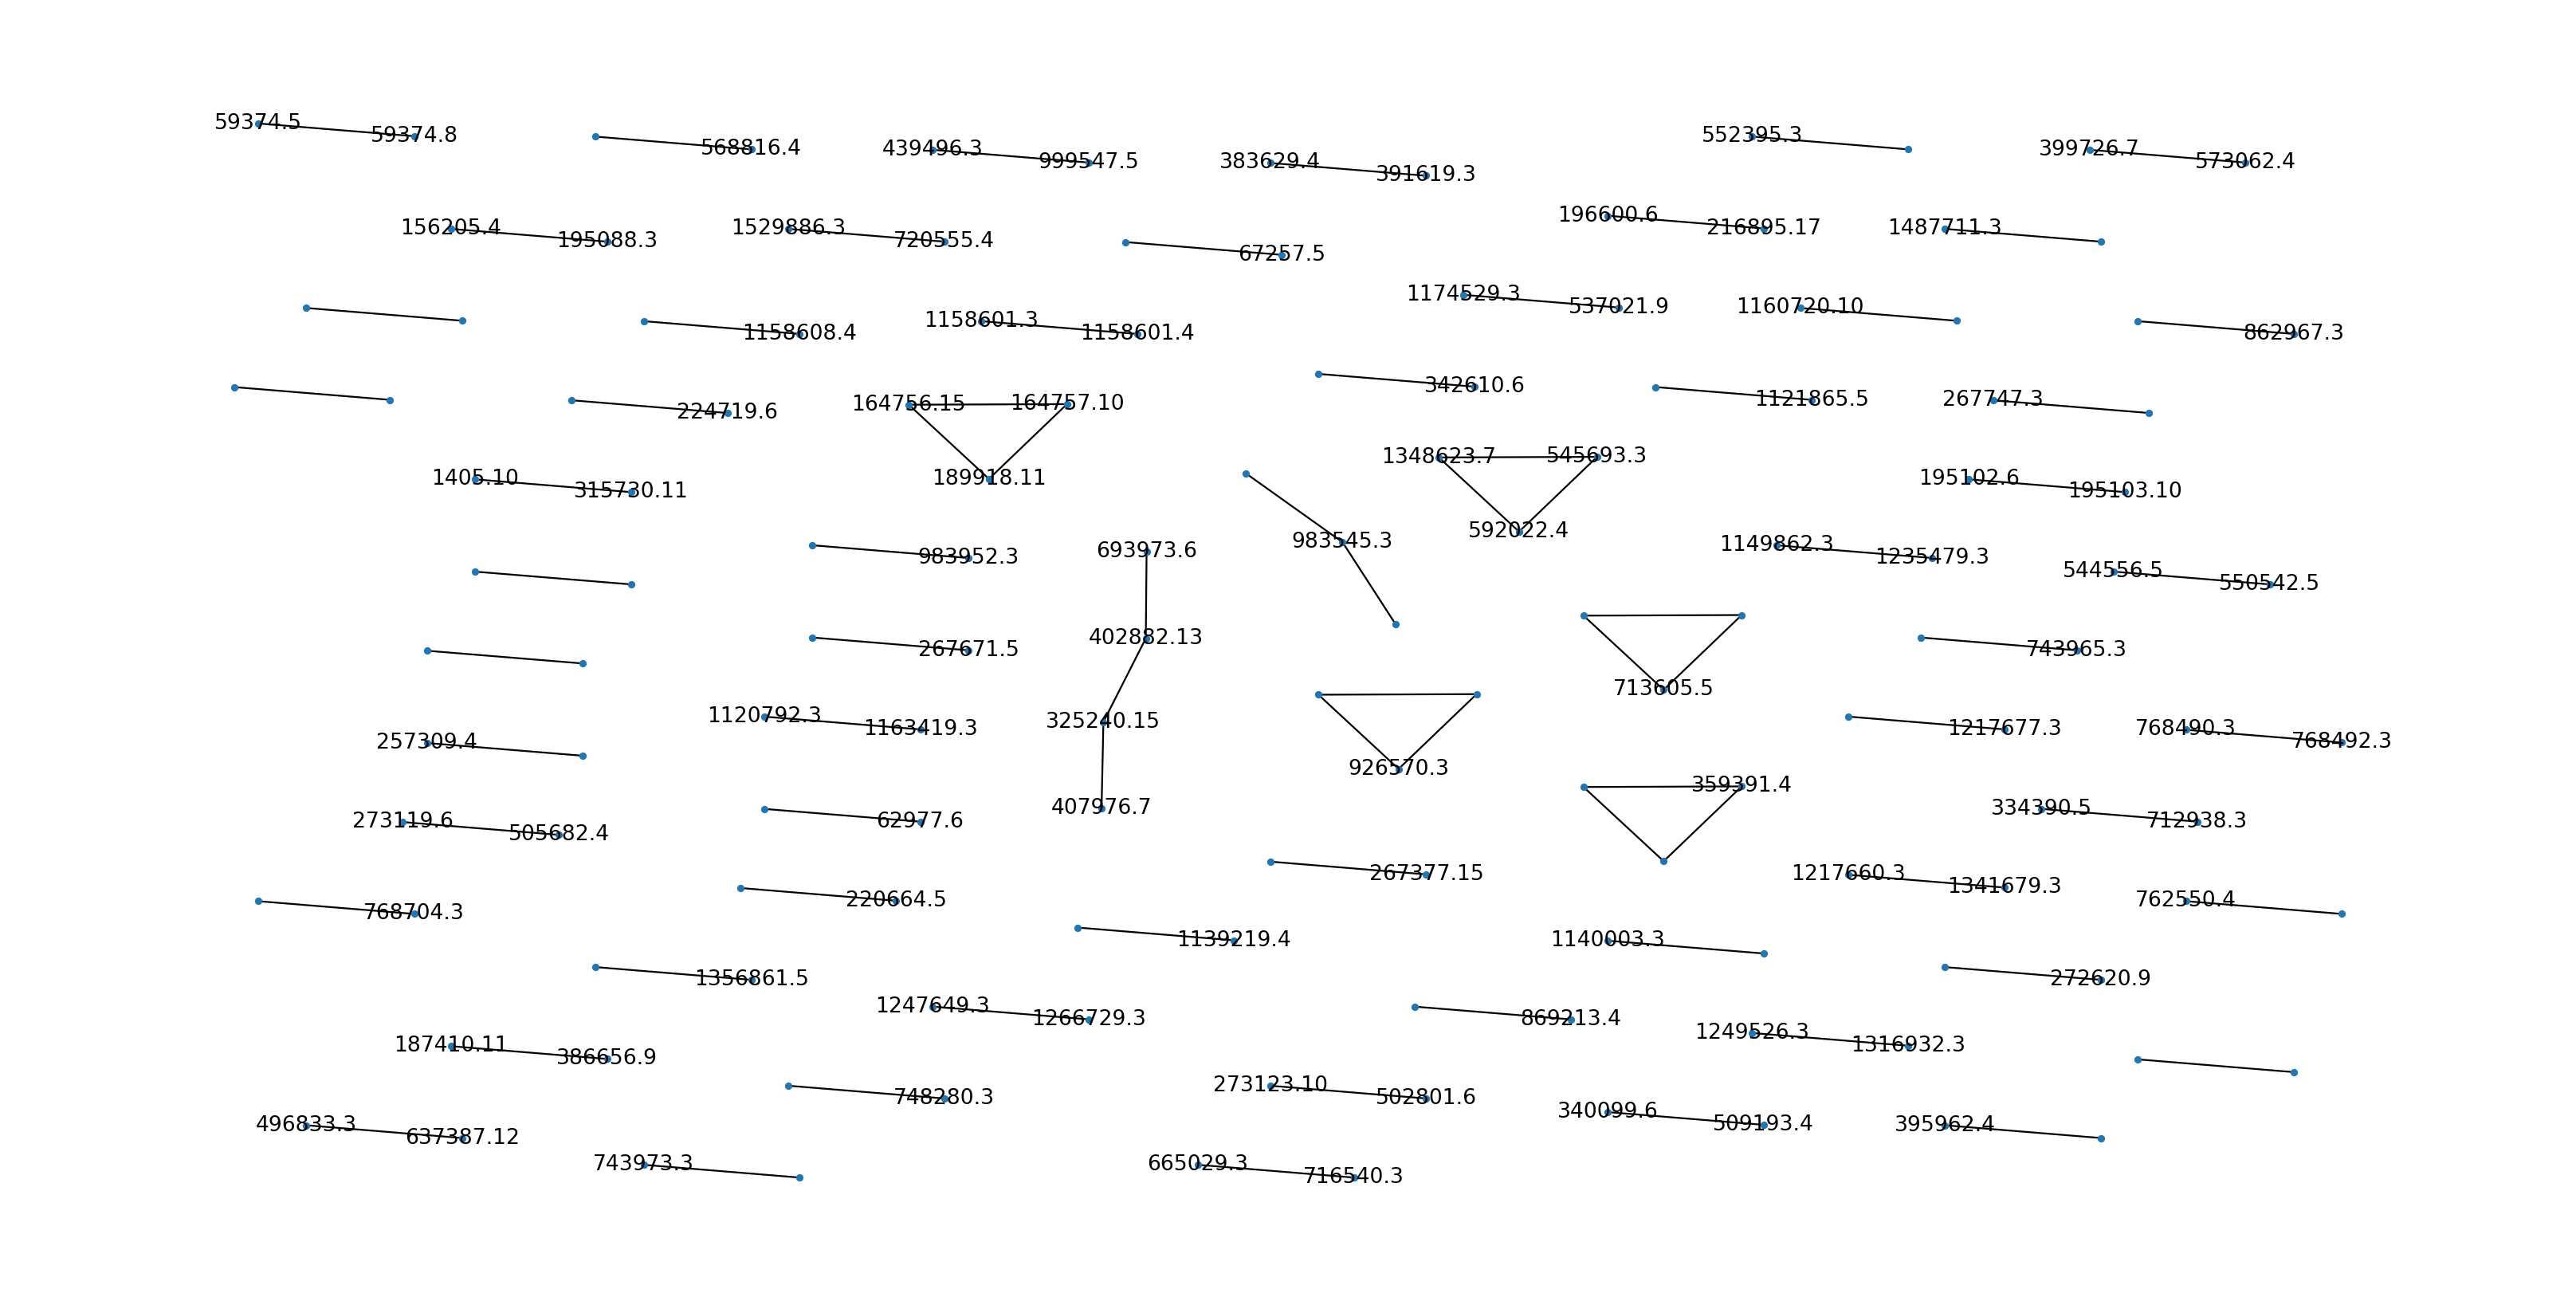

In [55]:
# based on https://stackoverflow.com/questions/49429594/pandas-dataframe-to-adjacency-matrix#49430091

ssu_merge = ssu.merge(ssu, on='feature.na_sequence_md5')
results2 = pd.crosstab(ssu_merge['genome.genome_id_x'], ssu_merge['genome.genome_id_y'])
np.fill_diagonal(results2.values, 0)

# get a densified adjacency matrix
results2_rows = results2.sum() > 0
results2_cols = results2_rows[results2_rows].index.unique()
results2 = results2.loc[results2_rows, results2_cols]

# initialize graph
G2 = nx.MultiGraph(results2.values)

# labels: only label nodes in db
labels = {node:label for node,label in zip(G2.nodes, results2.index)}
for node in labels:
    if labels[node] not in list(db['genome']):
        labels[node] = ''

# prune graph of nodes not in DB
to_remove = []
for x in nx.connected_components(G2):
    delete = True
    for node in x:
        if labels[node] != '':
            delete = False
    if delete:
        to_remove.append(node)
for node in to_remove:
    G2.remove_node(node)
    labels.pop(node)

# prune graph of singletons
to_remove2 = []
for x in nx.connected_components(G2):
    if len(x) == 1:
        for node in x:
            to_remove2.append(node)
for node in set(to_remove2):
    G2.remove_node(node)
    labels.pop(node)

fig = plt.figure(figsize=(20,10))
nx.draw(
    G2,
    pos=graphviz_layout(G2),
    node_size=10,
    labels=labels
)
fig.set_facecolor("#fffff800")

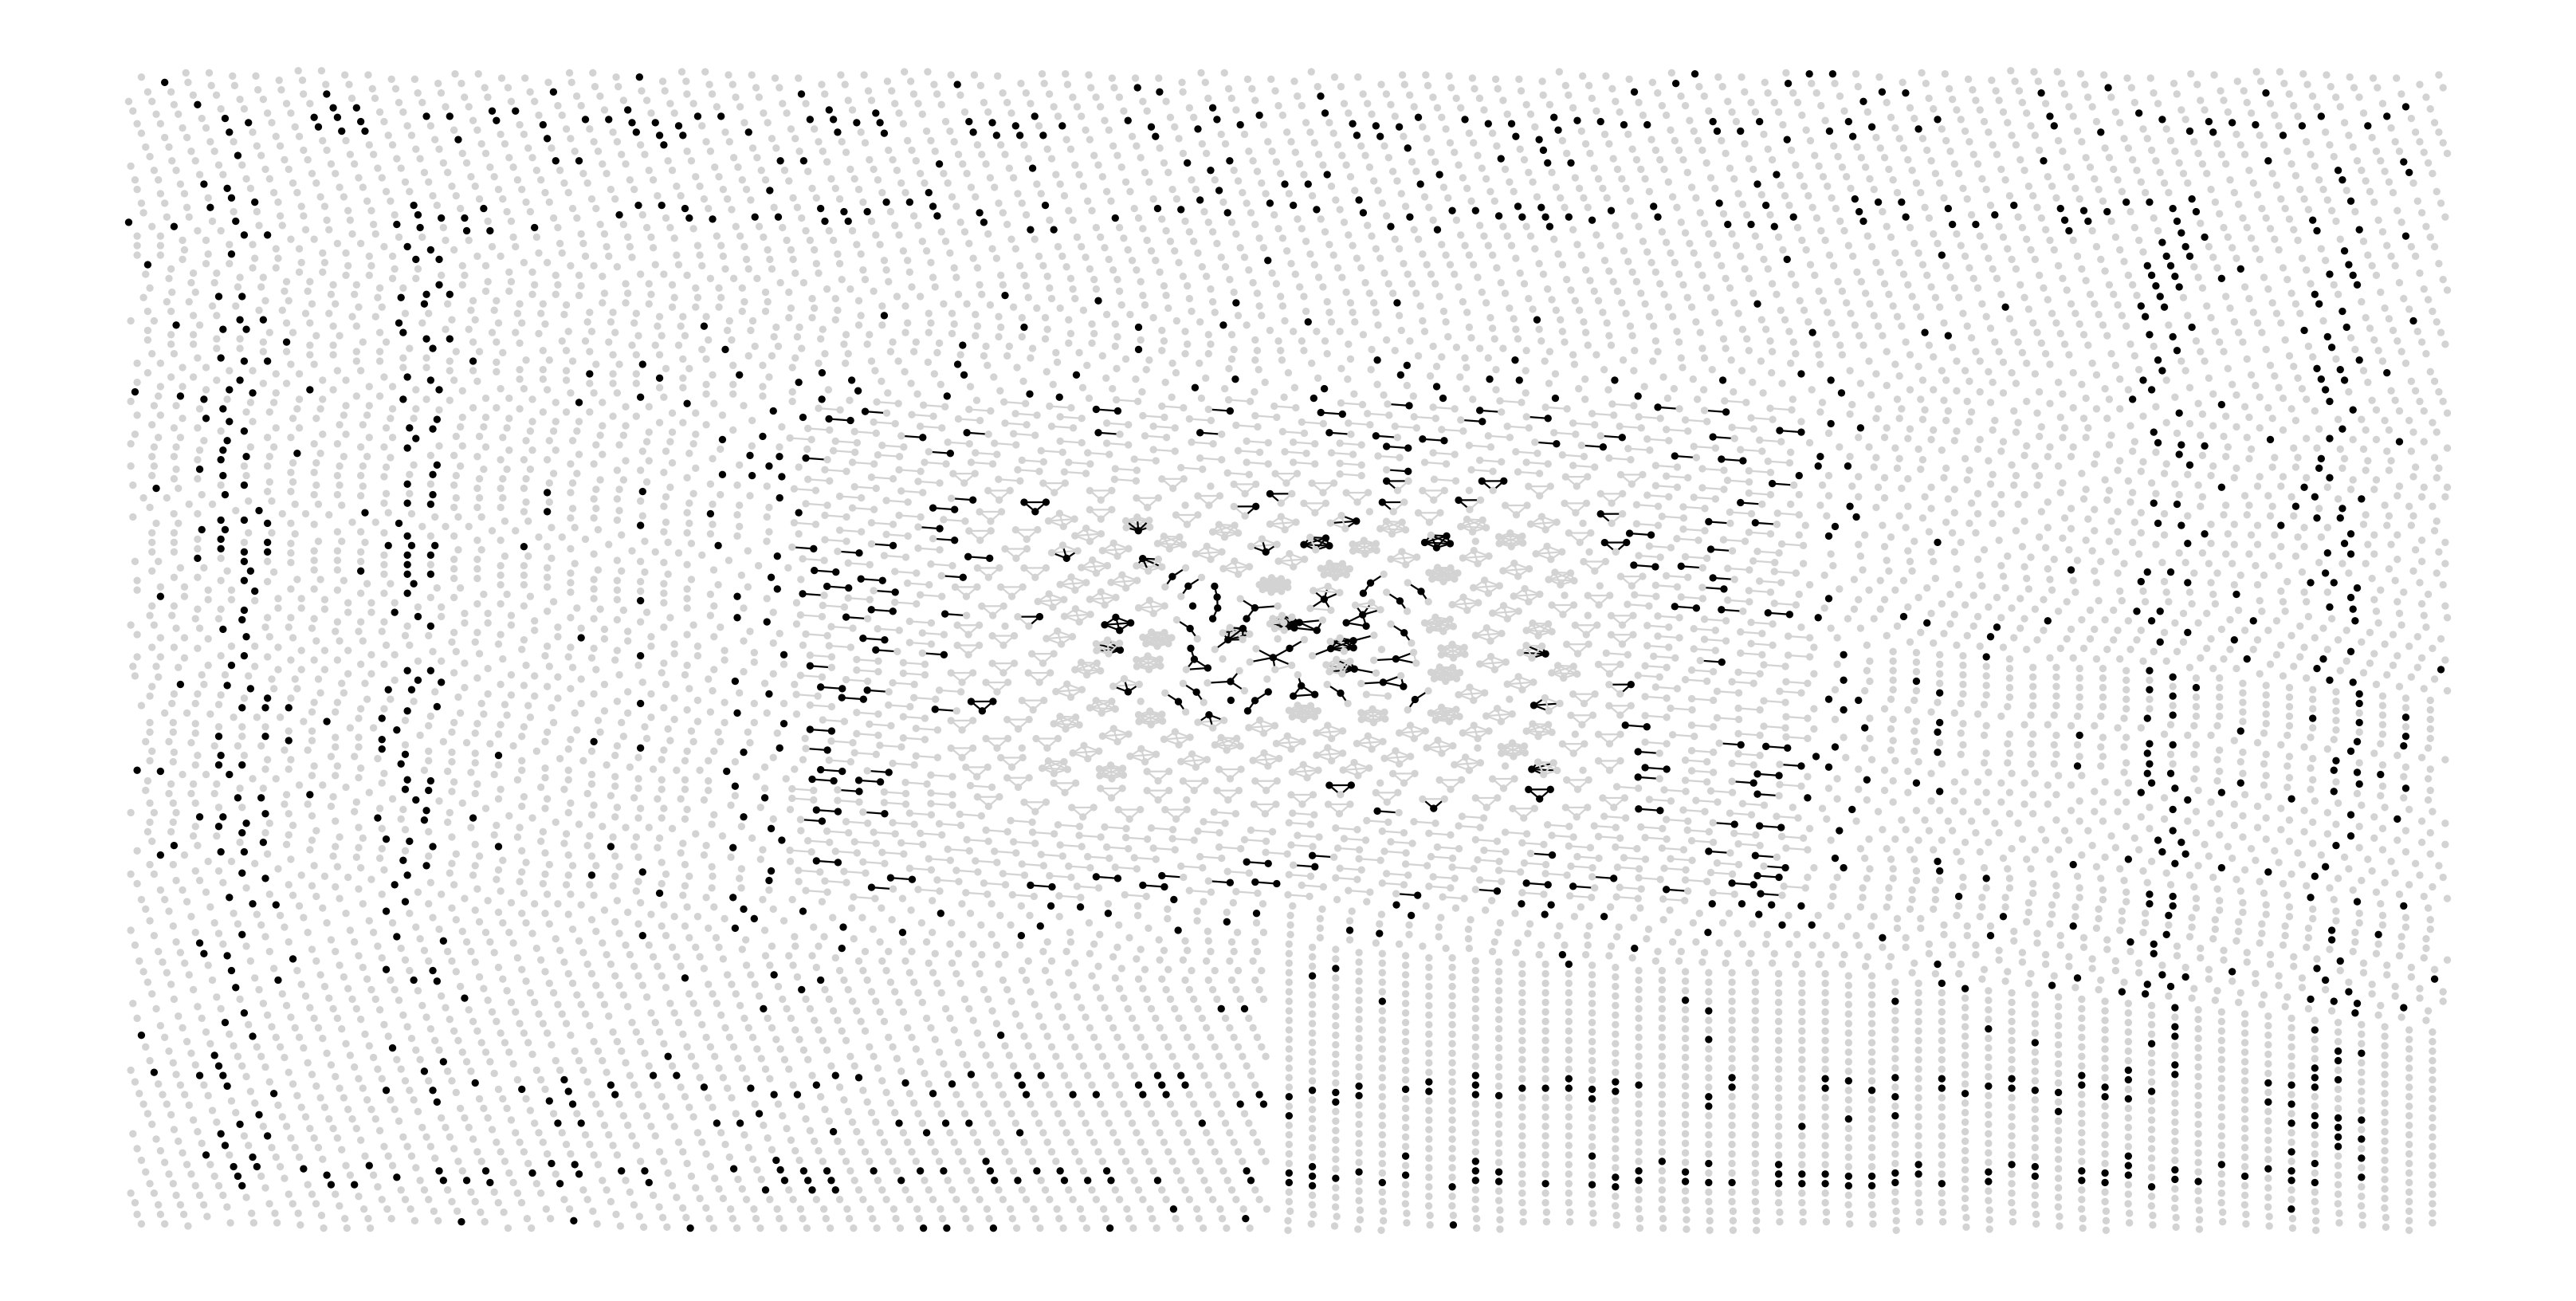

In [81]:
# same thing but with contigs, unpruned. this will get ugly...
# this takes ~15m to run

ssu_merge = ssu.merge(ssu, on='feature.na_sequence_md5')
results2 = pd.crosstab(ssu_merge['feature.accession_x'], ssu_merge['feature.accession_y'])
np.fill_diagonal(results2.values, 0)

# initialize graph
G2 = nx.MultiGraph(results2.values)

# labels: only label nodes in db
labels = {node:label for node,label in zip(G2.nodes, results2.index)}
for node in labels:
    if labels[node] not in list(db['contig']):
        labels[node] = ''

# node colors
colors = []
for node in G2.nodes:
    if labels[node] != '':
        colors.append('black')
    else:
        colors.append('lightgray')

# edge colors
edge_colors = []
for edge in G2.edges:
    if labels[edge[0]] != '' or labels[edge[1]] != '':
        edge_colors.append('black')
    else:
        edge_colors.append('lightgray')

fig = plt.figure(figsize=(20,10))
nx.draw(
    G2,
    pos=graphviz_layout(G2),
    node_size=10,
    # labels=labels,
    node_color=colors,
    edge_color=edge_colors,
)
fig.set_facecolor("#fffff800")